In [1]:
import nibabel as nib 
from pathlib import Path

In [2]:
file_path = Path("../data/nifti/liver_20.nii")
img = nib.load(file_path)
img_data = img.get_fdata()
img_data.shape

(206, 206, 154)

In [3]:
# print(img.header)
header = img.header
# header.get_n_slices
for field in header:
    print(f"{field}: {header[field]}")

sizeof_hdr: 348
data_type: b''
db_name: b''
extents: 0
session_error: 0
regular: b'r'
dim_info: 0
dim: [  3 206 206 154   1   1   1   1]
intent_p1: 0.0
intent_p2: 0.0
intent_p3: 0.0
intent_code: 0
datatype: 16
bitpix: 32
slice_start: 0
pixdim: [1. 2. 2. 3. 0. 0. 0. 0.]
vox_offset: 0.0
scl_slope: nan
scl_inter: nan
slice_end: 0
slice_code: 0
xyzt_units: 2
cal_max: 0.0
cal_min: 0.0
slice_duration: 0.0
toffset: 0.0
glmax: 0
glmin: 0
descrip: b''
aux_file: b''
qform_code: 1
sform_code: 0
quatern_b: 0.0
quatern_c: 0.0
quatern_d: 0.0
qoffset_x: -199.49417114257812
qoffset_y: -347.9120178222656
qoffset_z: -487.1999816894531
srow_x: [0. 0. 0. 0.]
srow_y: [0. 0. 0. 0.]
srow_z: [0. 0. 0. 0.]
intent_name: b''
magic: b'n+1'


# Understanding Medical Image Orientation: RAS Coordinate System

## What is RAS Orientation?

In medical imaging, orientation is specified using a three-letter code that defines how the image coordinates map to anatomical directions. RAS ('R', 'A', 'S') is one of the most common coordinate systems used, especially in neuroimaging.

## Breaking Down RAS

Each letter in RAS represents the anatomical direction that increases as you move along the positive direction of each axis in your image:

- **R (Right)**: The first dimension (x-axis) increases as you move from the left side to the right side of the body
- **A (Anterior)**: The second dimension (y-axis) increases as you move from the back to the front of the body
- **S (Superior)**: The third dimension (z-axis) increases as you move from the bottom to the top of the body

### Anatomical Direction Abbreviations

The orientation codes use these standard anatomical direction abbreviations:

- **R**: Right
- **L**: Left
- **A**: Anterior (front)
- **P**: Posterior (back)
- **S**: Superior (top)
- **I**: Inferior (bottom)

## Clinical Significance of RAS Orientation

The RAS orientation ('R', 'A', 'S') provides a standardized way to interpret 3D medical images:

- X-axis: Moving along first dimension takes you from left to right
- Y-axis: Moving along second dimension takes you from posterior to anterior (back to front)
- Z-axis: Moving along third dimension takes you from inferior to superior (bottom to top)

This "neurological convention" is crucial for:

- Ensuring left and right sides of the brain are correctly identified
- Properly aligning images from different scans or patients
- Correctly applying anatomical atlases
- Accurate surgical planning

## Common Alternative Orientations

Different imaging modalities and software may use different coordinate systems:

| System | Description | Common Usage |
|--------|-------------|--------------|
| RAS+ | Right-Anterior-Superior | NIfTI standard, FSL, FreeSurfer |
| LPS | Left-Posterior-Superior | DICOM default |
| LAS | Left-Anterior-Superior | Some neuroimaging tools |
| RAI | Right-Anterior-Inferior | Alternative convention |

## Clinical Importance

Understanding image orientation is crucial for:

1. **Clinical Interpretation**
   - Ensures correct anatomical side identification
   - Prevents left-right confusion in diagnosis

2. **Surgical Planning**
   - Accurate localization of pathology
   - Precise surgical approach planning

3. **Image Processing**
   - Correct image registration
   - Accurate multi-modal image fusion
   - Standardized analysis pipelines

4. **Research Applications**
   - Population studies
   - Atlas generation
   - Statistical analysis

## Technical Implementation

In imaging formats like NIfTI, orientation information is stored in:

- The affine transformation matrix
- Header orientation fields
- Quaternion parameters

This metadata ensures that images can be correctly displayed and processed regardless of how they were acquired.

## Best Practices

1. Always verify image orientation before analysis
2. Use orientation-preserving transformations
3. Document any orientation changes in processing pipeline
4. Include orientation checks in quality control procedures

## Common Pitfalls

- Assuming all images are in the same orientation
- Ignoring orientation during image registration
- Not accounting for orientation in custom processing scripts
- Misinterpreting left-right in displayed images

## Tools for Orientation Handling

- FSL: `fslreorient2std`
- ANTs: `AntsApplyTransforms`
- NiBabel: `as_closest_canonical()`
- 3D Slicer: Reformat module

## References

1. NIfTI-1 Data Format Specification
2. Neuroimaging Informatics Technology Initiative
3. DICOM Standard PS3.3

## Affine Transformation Matrix in Medical Imaging
### What is an Affine Transformation Matrix?
An affine transformation matrix in the context of medical imaging (like NIFTI files) is a 4×4 matrix that maps voxel coordinates in the image to real-world coordinates (typically in millimeters). It's a crucial piece of metadata that preserves spatial information about how the image relates to physical space.
### Components of the Affine Matrix
The general form of a 4×4 affine transformation matrix is:
<pre>
| a₁₁ a₁₂ a₁₃ t₁ |
| a₂₁ a₂₂ a₂₃ t₂ |
| a₃₁ a₃₂ a₃₃ t₃ |
| 0   0   0   1  |
<pre>

Where:
    The 3×3 submatrix (a₁₁ to a₃₃) represents rotation and scaling
    The column vector (t₁, t₂, t₃) represents translation
What the Affine Matrix Tells You
    1.  Voxel Size: The scaling factors (diagonal elements when the matrix is properly oriented)
    2.  Orientation: How the image is oriented in physical space
    3.  Origin: Where the (0,0,0) voxel is located in physical space

Practical Uses
    1. Spatial Normalization: Aligning images to a standard space
    2. Registration: Aligning images from different modalities or time points
    3. Measurements: Making accurate physical measurements in the image
    4. Visualization: Correctly displaying the image in 3D viewer

In [4]:
# Get the affine matrix from your NIFTI image
import numpy as np
affine = img.affine
print("Affine Transformation Matrix:")
print(affine)

# Extract voxel sizes (mm)
voxel_sizes = np.sqrt(np.sum(affine[:3, :3]**2, axis=0))
print(f"Voxel sizes (mm): {voxel_sizes}")

# Get the origin (in world coordinates)
origin = affine[:3, 3]
print(f"Origin (mm): {origin}")

# Convert a voxel coordinate to world coordinate
voxel_coord = np.array([100, 100, 50, 1])  # Homogeneous coordinates
world_coord = affine @ voxel_coord  # Matrix multiplication
print(f"Voxel coordinate {voxel_coord[:3]} maps to world coordinate {world_coord[:3]} mm")

# Get orientation in more readable format
import nibabel as nib
print(f"Orientation: {nib.aff2axcodes(affine)}")

Affine Transformation Matrix:
[[   2.            0.            0.         -199.49417114]
 [   0.            2.            0.         -347.91201782]
 [   0.            0.            3.         -487.19998169]
 [   0.            0.            0.            1.        ]]
Voxel sizes (mm): [2. 2. 3.]
Origin (mm): [-199.49417114 -347.91201782 -487.19998169]
Voxel coordinate [100 100  50] maps to world coordinate [   0.50582886 -147.91201782 -337.19998169] mm
Orientation: ('R', 'A', 'S')


In [5]:
affine[:3, :3]


array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]])

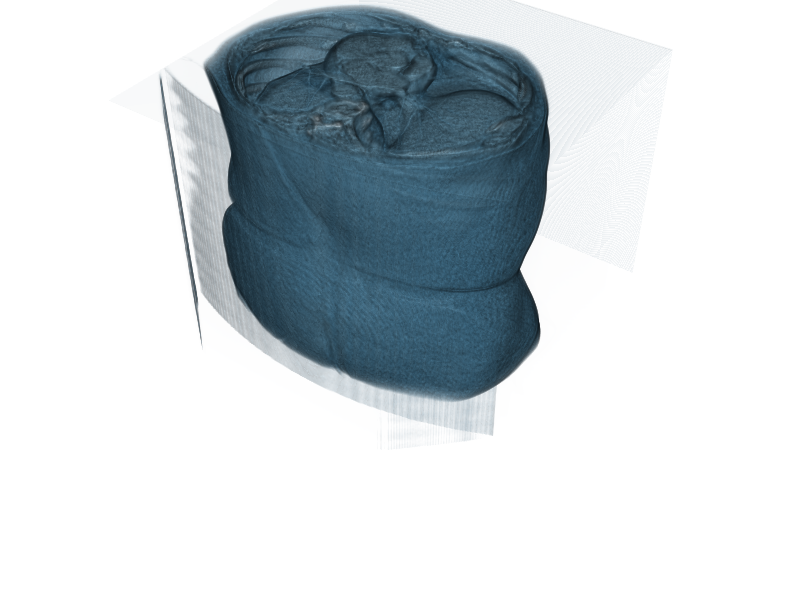

In [6]:
from vedo import Volume, show, Plotter
import nibabel as nib

# Visualize the volume
volume = Volume(img_data)
show(volume, axes=0, viewup="z")


 Medical Imaging: Understanding Slices in 3D Volumetric Data

## What are Slices?
In medical imaging, particularly in 3D volumetric data like NIFTI files, slices refer to 2D cross-sectional images extracted from a 3D volume. Think of them like cutting through a loaf of bread - each cut gives you a 2D slice of the 3D loaf.

## Types of Slices
For a NIFTI file with dimensions (206, 206, 154), there are three standard orientations for slices:

### Axial (Transverse) Slices
- Horizontal cuts that divide the body into top and bottom portions
- Obtained by fixing the z-coordinate (the third dimension)
- Accessed via ~volume[:, :, z_index]~
- Total of 154 axial slices in this dataset

### Coronal Slices
- Vertical cuts that divide the body into front and back portions
- Obtained by fixing the y-coordinate (the second dimension)
- Accessed via ~volume[:, y_index, :]~
- Total of 206 coronal slices in this dataset

### Sagittal Slices
- Vertical cuts that divide the body into left and right portions
- Obtained by fixing the x-coordinate (the first dimension)
- Accessed via ~volume[x_index, :, :]~
- Total of 206 sagittal slices in this dataset

### Coordinate System
<pre> 
    z
    │
    │
    │
    └───────y
   /
  /
 /
x
<pre> 

- Moving along x-axis gives you different sagittal slices
- Moving along y-axis gives you different coronal slices
- Moving along z-axis gives you different axial slices

## Clinical Significance
Radiologists and clinicians examine these different slice orientations to:
- Get a comprehensive view of anatomical structures
- Identify abnormalities from multiple perspectives
- Plan surgical approaches
- Track changes over time


In [7]:
import matplotlib.pyplot as plt
def plot_slice(volume, slice_num, axis=2):
    """
    Plot a slice from a 3D volume
    
    Parameters:
    -----------
    volume : 3D numpy array
        The 3D volume data
    slice_num : int
        The slice number to display
    axis : int
        The axis along which to slice (0=sagittal, 1=coronal, 2=axial)
    """
    plt.figure(figsize=(8, 8))
    
    if axis == 0:
        plt.imshow(volume[slice_num, :, :].T, cmap='gray')
        plt.title(f'Sagittal Slice (x={slice_num})')
    elif axis == 1:
        plt.imshow(volume[:, slice_num, :].T, cmap='gray')
        plt.title(f'Coronal Slice (y={slice_num})')
    else:  # axis == 2
        plt.imshow(volume[:, :, slice_num].T, cmap='gray')
        plt.title(f'Axial Slice (z={slice_num})')
    
    plt.colorbar()
    plt.axis('off')
    plt.tight_layout()
    plt.show()

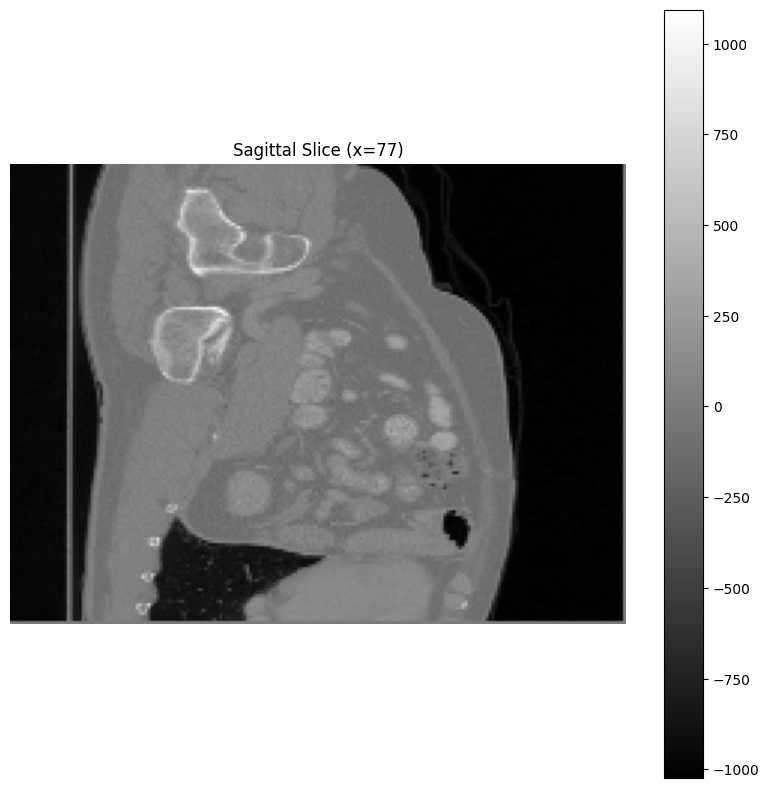

In [8]:

plot_slice(img_data, 77, axis=0)

Image shape: (206, 206, 154)
Central indices: x=103, y=103, z=77


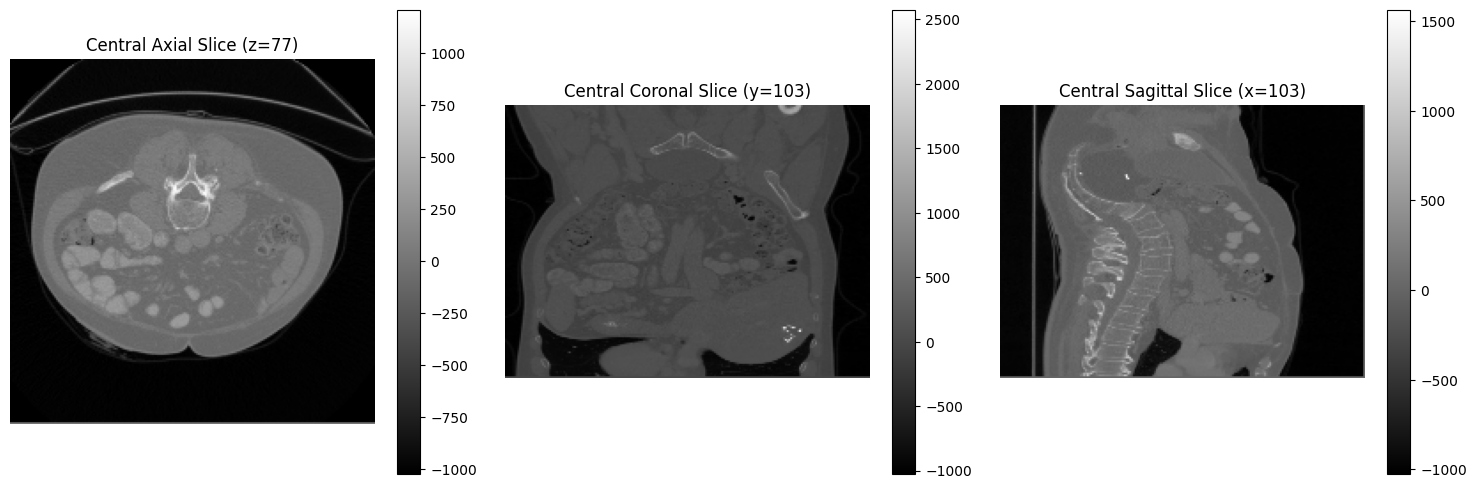

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Plot centeral slices 
# Get the shape of your image data
shape = img_data.shape
print(f"Image shape: {shape}")

# Calculate the central indices for each dimension
central_x = shape[0] // 2
central_y = shape[1] // 2
central_z = shape[2] // 2

print(f"Central indices: x={central_x}, y={central_y}, z={central_z}")

# Display the central slices in all three orientations
plt.figure(figsize=(15, 5))

# Central axial slice (z-plane)
plt.subplot(1, 3, 1)
plt.imshow(img_data[:, :, central_z].T, cmap='gray')
plt.title(f'Central Axial Slice (z={central_z})')
plt.colorbar()
plt.axis('off')

# Central coronal slice (y-plane)
plt.subplot(1, 3, 2)
plt.imshow(img_data[:, central_y, :].T, cmap='gray')
plt.title(f'Central Coronal Slice (y={central_y})')
plt.colorbar()
plt.axis('off')

# Central sagittal slice (x-plane)
plt.subplot(1, 3, 3)
plt.imshow(img_data[central_x, :, :].T, cmap='gray')
plt.title(f'Central Sagittal Slice (x={central_x})')
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.show()